In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\sleep_health_&_lifestyle.csv")

In [3]:
# Gives information about variables with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# Make a copy of the file to retain the original document (2)Fill the NaN in 'Sleep Disorder' with 'None'
# (3)Remove the authomatic index numbering generated by pandas
df2 = df.copy()
df2 = df.fillna('None')
df2.set_index("Person ID", inplace=True)
df2.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [12]:
df3 = df.copy()
df3 = df.fillna('None')
df3.set_index("Person ID", inplace=True)
df3.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [6]:
# Apply LabelEncoding on multiple variables
df2[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']] = df2[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']].apply(LabelEncoder().fit_transform)

In [7]:
df2.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,3,11,77,4200,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1


In [9]:
# Using the correlation function to find out which of the variables are related
df2.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,-0.176272,0.217105,-0.014509,-0.253415
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,0.572813,-0.225606,0.057973,0.232000
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.546791,0.043928,-0.105877,-0.169800
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.191704,-0.516455,-0.039533,0.177552
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.147769,-0.659865,0.016791,0.179592
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.271913,0.136971,0.772723,0.433214
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.117545,0.670026,0.186829,-0.036058
BMI Category,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.724217,0.295585,-0.005059,0.016573
Blood Pressure,-0.176272,0.572813,0.546791,-0.191704,-0.147769,0.271913,0.117545,0.724217,1.000000,0.288300,0.119455,0.197906
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.295585,0.288300,1.000000,-0.030309,0.205987


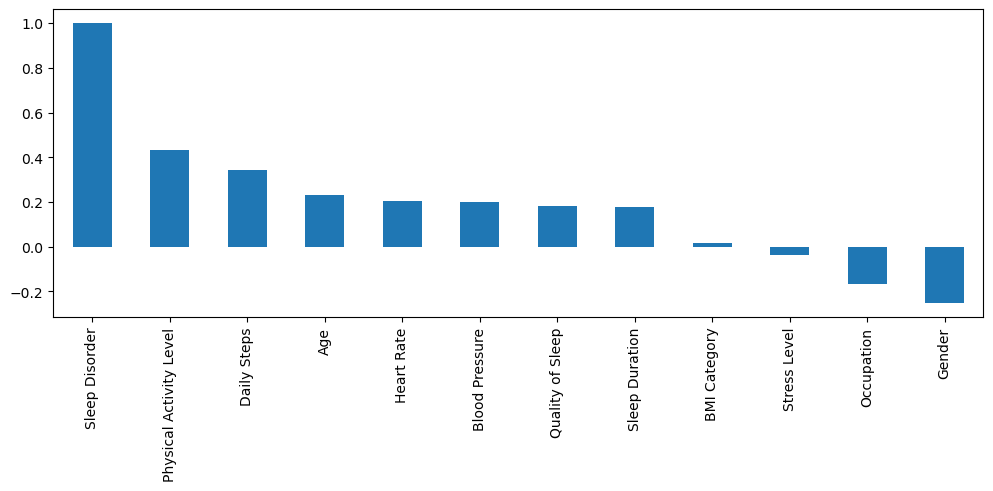

In [18]:
# Correlation plot according to the 'y' variable 'Sleep Disorder'
plt.figure(figsize=(12, 4))
df2.corr()['Sleep Disorder'].sort_values(ascending=False).plot(kind='bar');

In [28]:
#le = LabelEncoder()
#label = le.fit_transform(df5["Sleep Disorder"])

In [29]:
#df6 = df5.drop("Sleep Disorder", axis='columns')
#df6["Sleep Disorder"] = label
#df6.head(2)

In [19]:
# Using feature bining to group the 'Age' variable
labels = ['27-35', '36-44', '45-53', 'Above 54']
bins = [27, 35, 44, 53, 62]
df3['Age_bin'] = pd.cut(df.Age, bins, labels=labels, include_lowest=True)
df3.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_bin
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,27-35
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,27-35


In [20]:
# Age in months(Age*12)
df3.Age_bin.value_counts().sort_values(ascending=True)

Age_bin
Above 54     42
45-53        82
27-35        93
36-44       156
Name: count, dtype: int64

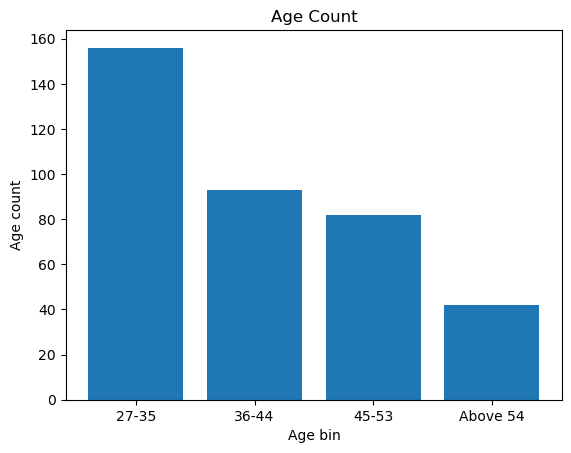

In [21]:
plt.bar(labels, df3.Age_bin.value_counts())
plt.title('Age Count')
plt.xlabel('Age bin')
plt.ylabel('Age count')
plt.show()

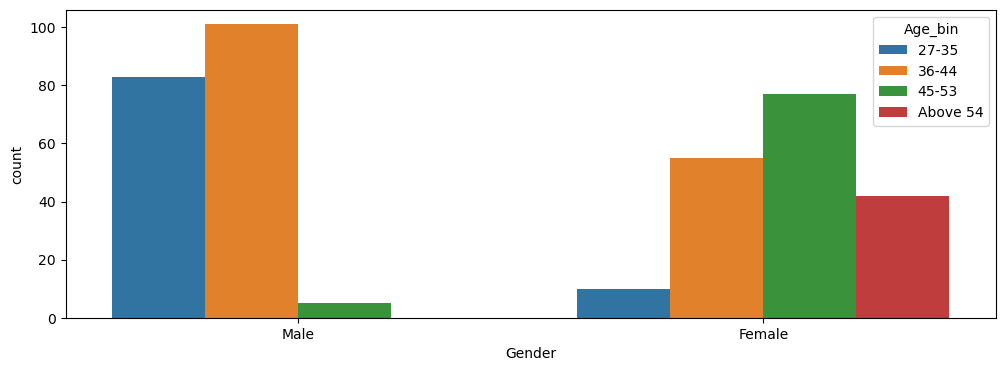

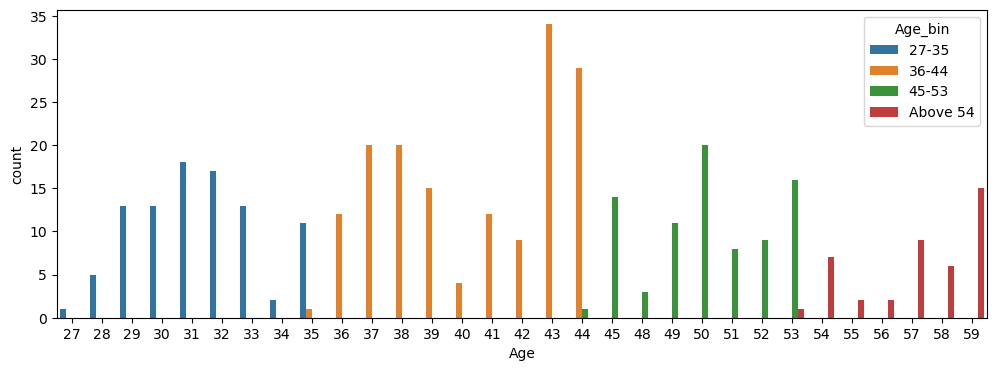

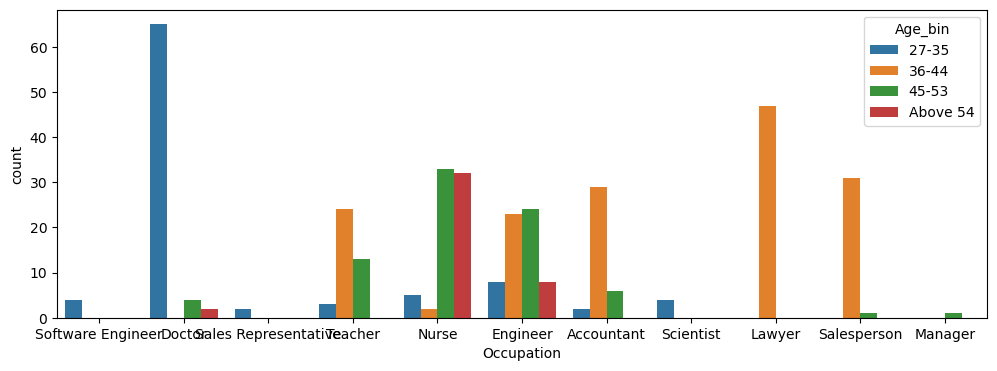

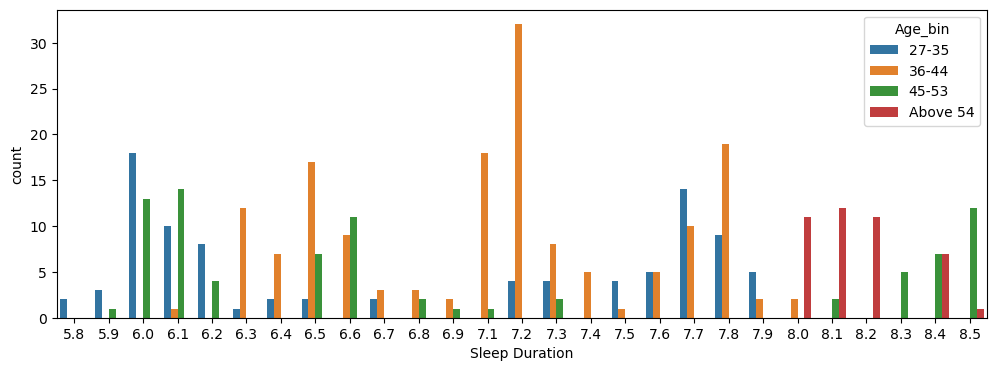

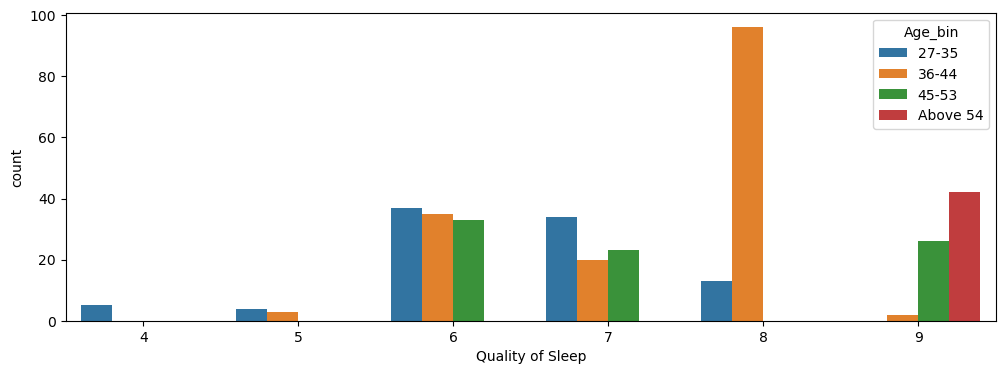

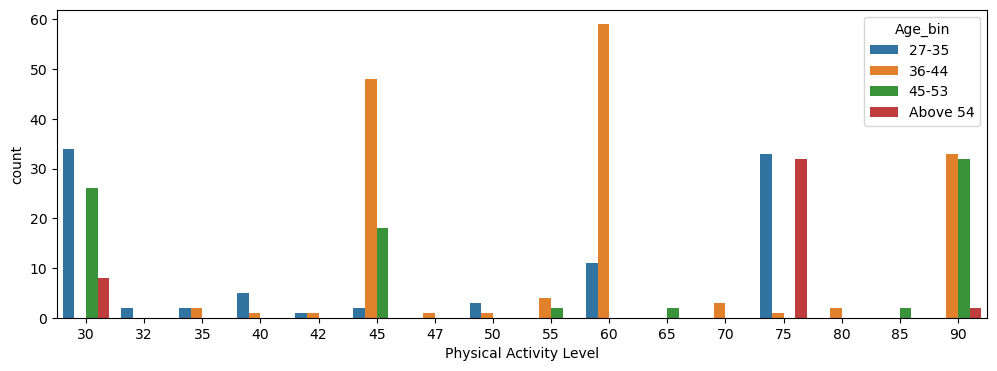

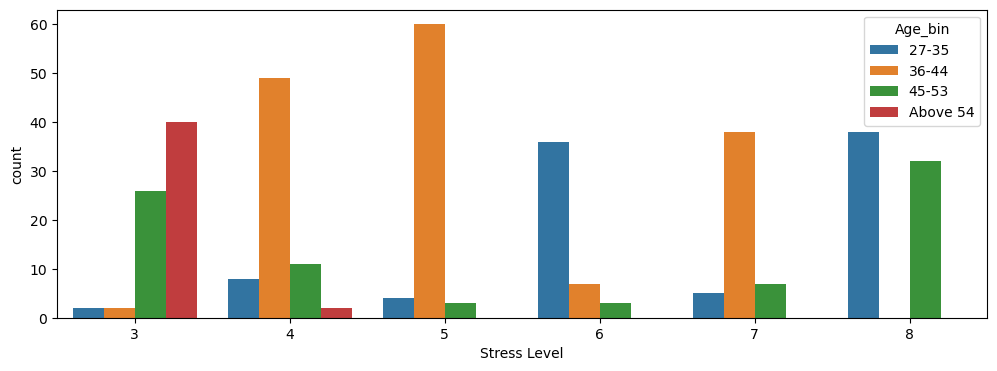

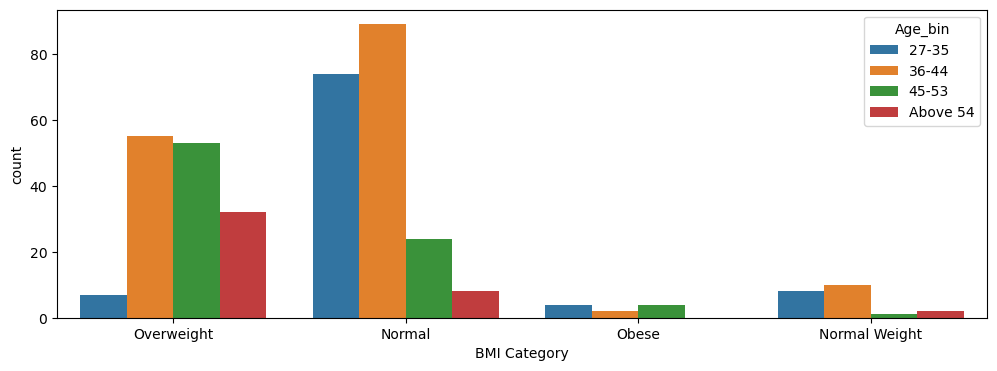

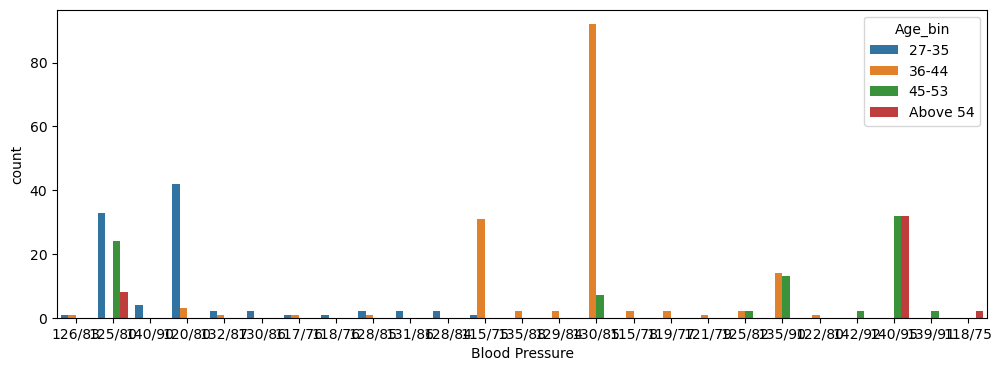

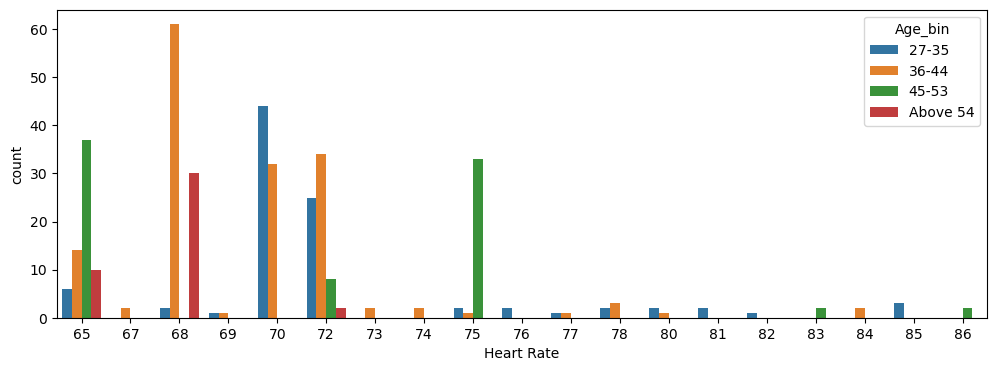

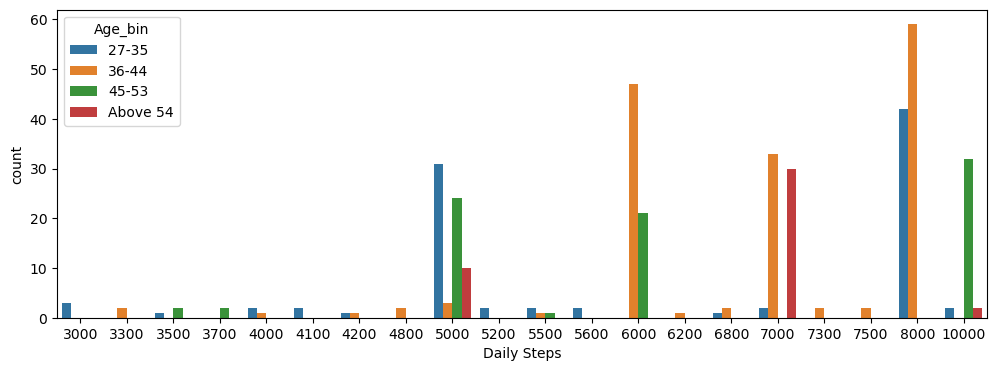

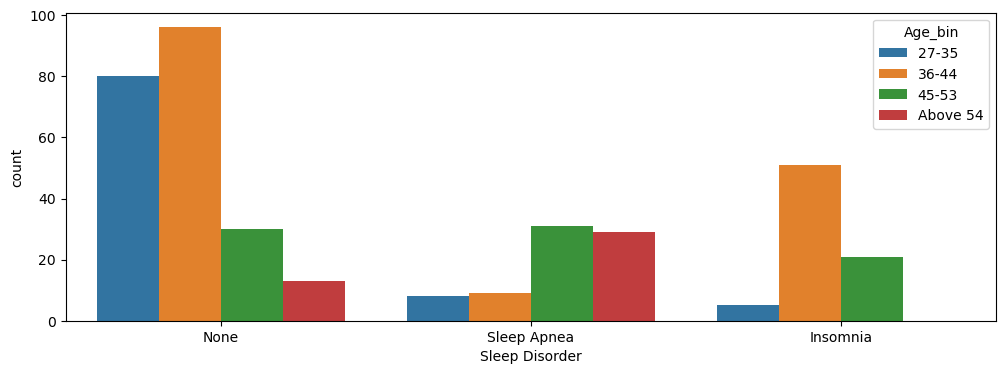

In [22]:
for i, predictor in enumerate(df3.drop(columns=['Age_bin'])):
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df3, x=predictor, hue='Age_bin');

In [14]:
# Grouping the occupation by quality of sleep
avg_slp = df3.groupby('Occupation')[['Age']].mean()
avg_slp

,Age
Occupation,
Accountant,39.621622
Doctor,32.676056
Engineer,46.587302
Lawyer,39.425532
Manager,45.000000
Nurse,51.794521
Sales Representative,28.000000
Salesperson,43.531250
Scientist,33.500000


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


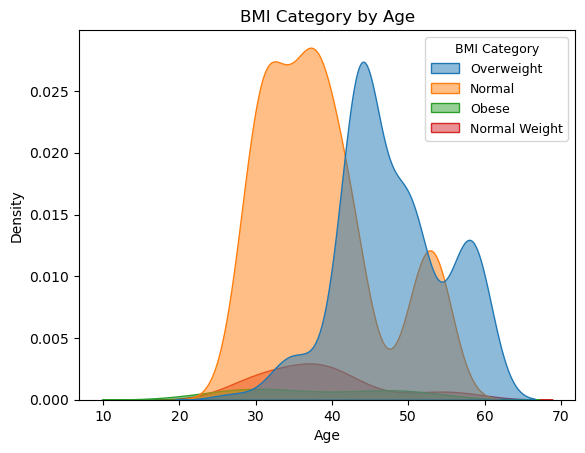

In [16]:
# In Kernel Density Estimate(kde), both th x & y axes should be numeric, the 'hue' can be categorical
# In the comparism between Age and BMI Category, the age group with the highest level of 'Overweight' are those above 38.
# Obese, Normal weight & Normal cuts across all ages that are <=38 
kde1 = sns.kdeplot(data=df3, x="Age", hue="BMI Category", fill=True, alpha=.5)
kde1.set_title('BMI Category by Age')
kde1.set_ylabel('Density')
kde1.set_xlabel('Age')
plt.setp(kde1.get_legend().get_texts(), fontsize='9')
plt.setp(kde1.get_legend().get_title(), fontsize='9');

In [24]:
df3.Age.max()

59

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


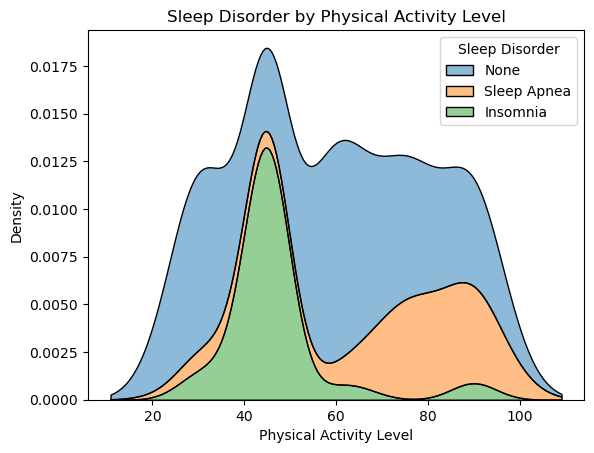

In [21]:
# Comparing the relationship between sleep disorder and physical activity level
# In the analysis of sleep disorder and physical activity level, those with the highest level of physical activity are
# more prone to sleep apnea while those with the lowest come down with Insomnia
kde2 = sns.kdeplot(data=df3, x="Physical Activity Level", hue="Sleep Disorder", fill=True, alpha=.5, multiple="stack")
kde2.set_title('Sleep Disorder by Physical Activity Level');

In [37]:
df3["Physical Activity Level"].max()

90

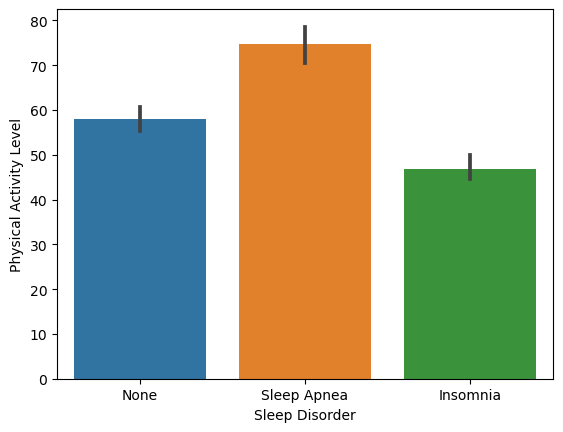

In [25]:
sns.barplot(data=df3, x='Sleep Disorder', y='Physical Activity Level');

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


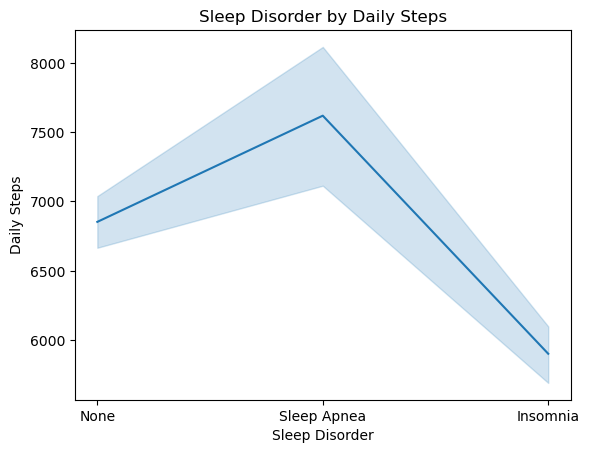

In [24]:
# Comparing sleep disorder with daily steps
# As the level of daily steps decreases, sleep disorder increases
plt.title("Sleep Disorder by Daily Steps")
sns.lineplot(data=df3, x='Sleep Disorder', y='Daily Steps');

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


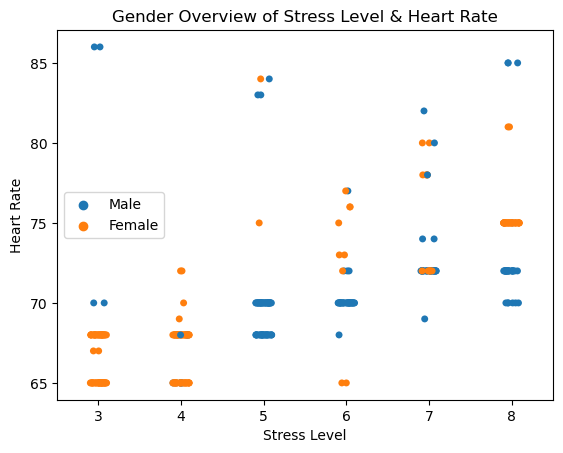

In [26]:
strip = sns.stripplot(x="Stress Level", y="Heart Rate", hue="Gender", data=df3, jitter=True)
plt.legend(loc='center left')
plt.title("Gender Overview of Stress Level & Heart Rate");

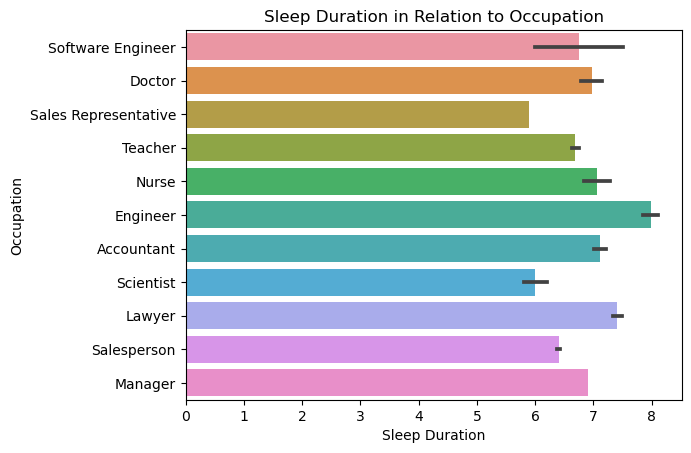

In [27]:
# From the chart below, Engineers have the highest level of sleep duration while Scientists and Sales Reps have the lowest
sns.barplot(data=df3, x='Sleep Duration', y='Occupation')
plt.title("Sleep Duration in Relation to Occupation");

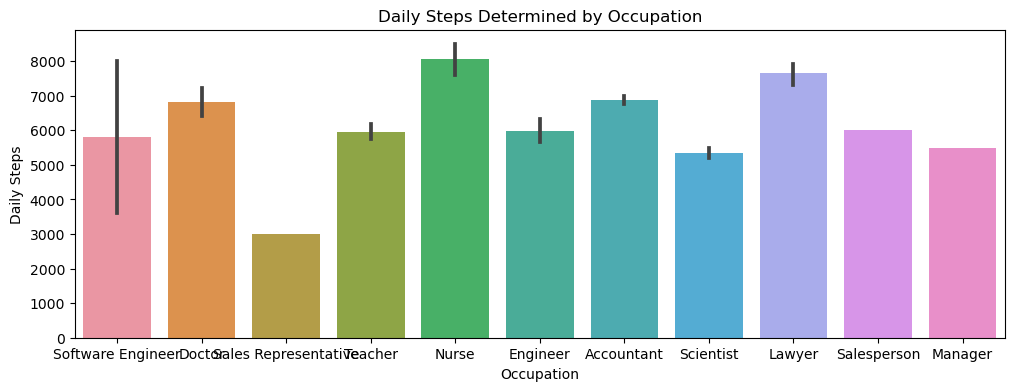

In [28]:
# From the analysis of Daily Steps and Occupation, Nurses are shown to engage the highest daily steps while
#Sales Reps engage the lowest
plt.figure(figsize=(12, 4))
sns.barplot(data=df3, x='Occupation', y='Daily Steps')
plt.title("Daily Steps Determined by Occupation");

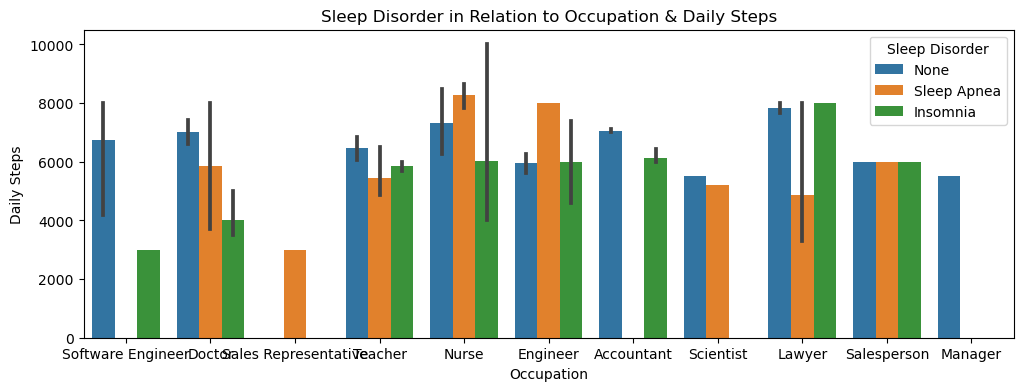

In [29]:
# From the analysis of Sleep Disorder by Occupation and Daily Steps, Lawyers come down with Insomnia more than other
#professions, Nurses with Sleep apnea more than others
plt.figure(figsize=(12, 4))
sns.barplot(data=df3, x='Occupation', y='Daily Steps', hue='Sleep Disorder')
plt.title("Sleep Disorder in Relation to Occupation & Daily Steps");

In [40]:
# Analysing Obesity by Occupation and Gender 
sdf = df3.loc[df3["BMI Category"]=='Obese']
sdf.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_bin
Person ID,,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-35
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-35


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


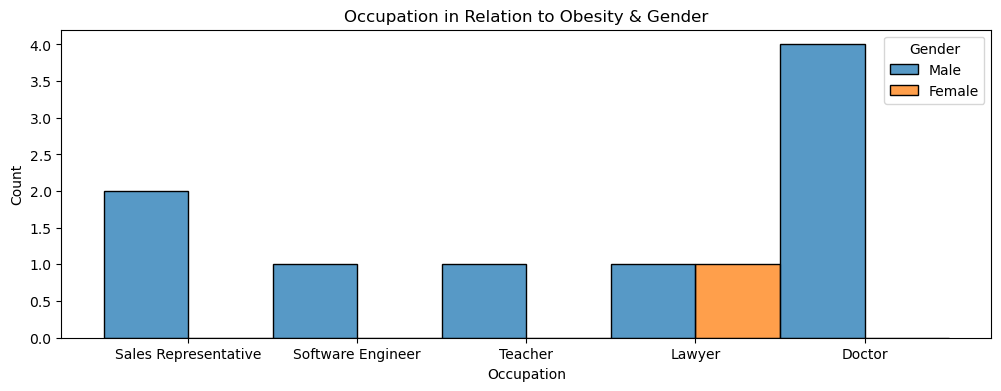

In [31]:
# Male Doctors have the highest level of Obesity, followed by male Sales Representatives. Female Lawyers are more significantly 
#Obesed than other professions
plt.figure(figsize=(12, 4))
sns.histplot(x='Occupation', hue='Gender', data=sdf, stat="count", multiple="dodge")
plt.title("Occupation in Relation to Obesity & Gender");

In [61]:
df3["Physical Activity Level"].mean()

59.17112299465241

In [32]:
# Producing a matrix before forming a heatma
df7 = df3.pivot_table(index='Occupation', columns='Sleep Disorder', values='Physical Activity Level')
df7.head(2)

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,47.142857,60.666667,NaN
Doctor,53.333333,54.609375,68.75


In [33]:
# Replace all 'NaN' with the mean of the Physical Activity Level
df8 = df7.fillna(59.2)
df8.head(3)

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,47.142857,60.666667,59.20
Doctor,53.333333,54.609375,68.75
Engineer,59.000000,50.561404,90.00


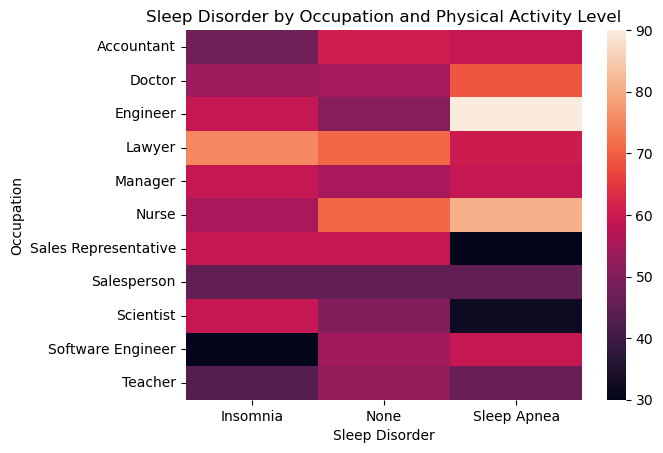

In [9]:
plt.title("Sleep Disorder by Occupation and Physical Activity Level")
sns.heatmap(df8);

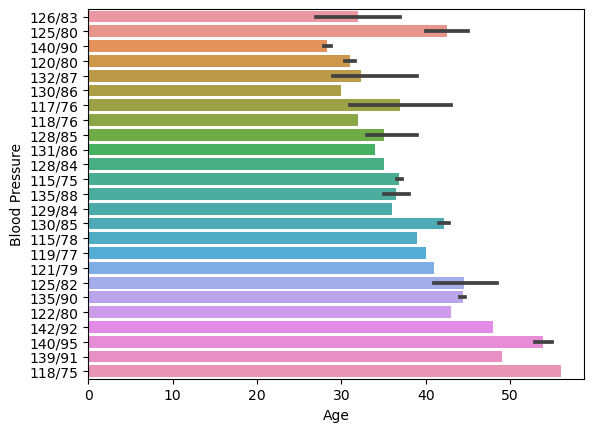

In [45]:
sns.barplot(data=df3, x='Age', y='Blood Pressure');

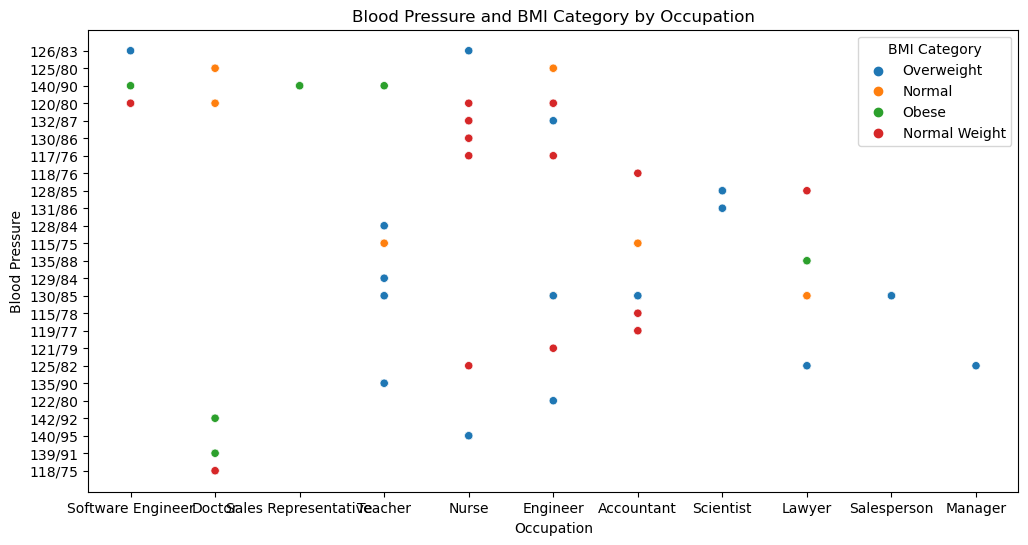

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df3, x="Occupation", y="Blood Pressure", hue="BMI Category")
plt.title('Blood Pressure and BMI Category by Occupation');

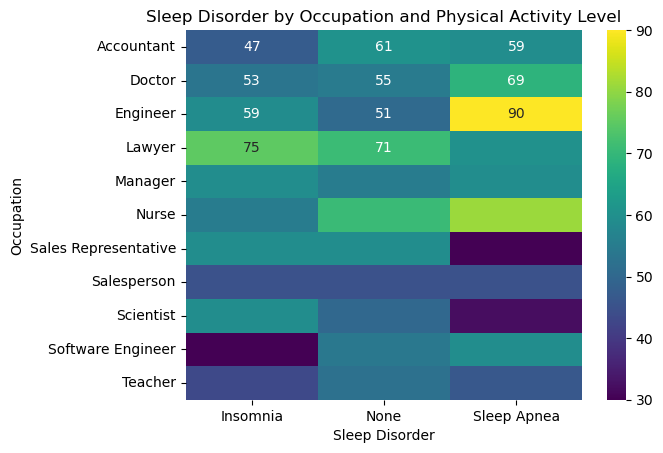

In [42]:
plt.title("Sleep Disorder by Occupation and Physical Activity Level")
sns.heatmap(df8, annot=True, cmap='viridis');

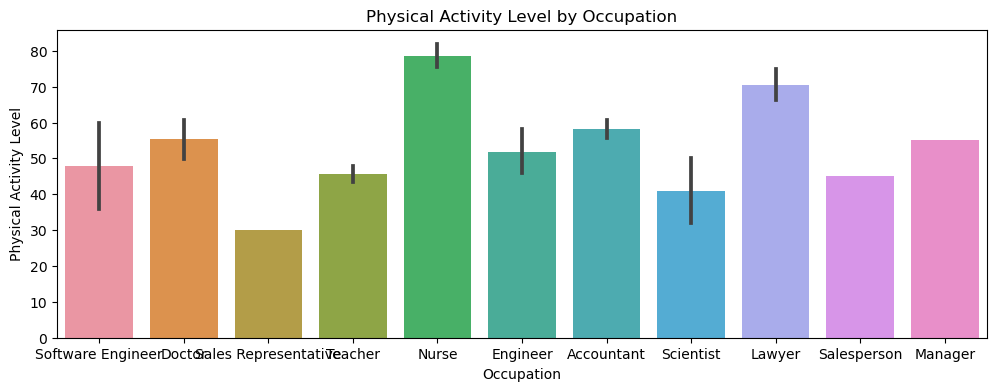

In [47]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df3, x='Occupation', y='Physical Activity Level')
plt.title('Physical Activity Level by Occupation');

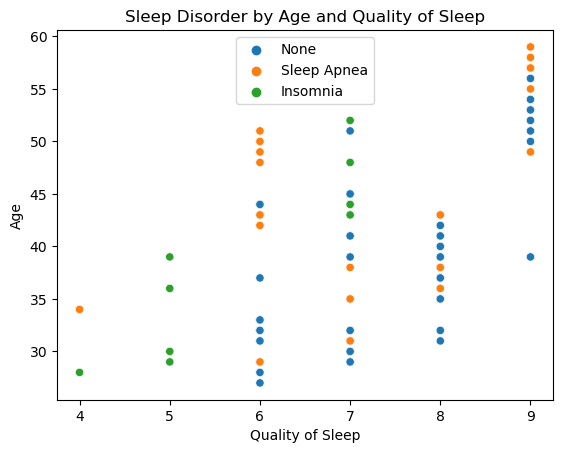

In [48]:
plt.title('Sleep Disorder by Age and Quality of Sleep')
sns.scatterplot(data=df3, x="Quality of Sleep", y="Age", hue="Sleep Disorder")
plt.legend(loc='upper center');

In [92]:
#WEBSCRAPPING
#import urllib.request 
#url = "https://www.wikipedia.org"
#resp = urllib.request.urlopen(url)
#print(resp)

In [93]:
#print(resp.status)

In [94]:
#https://imgur.com/gallery/overlay-photo-of-mens-100-meters-race-dNM024U
    


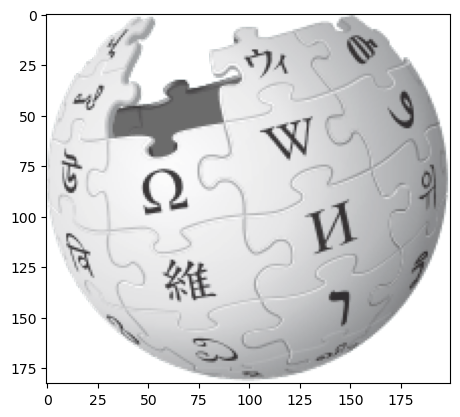

In [95]:
from urllib.request import urlretrieve
urlretrieve("https://www.wikipedia.org/portal/wikipedia.org/assets/img/Wikipedia-logo-v2.png","Wikipedia-logo-v2.png")
from PIL import Image
img = Image.open("Wikipedia-logo-v2.png")
plt.imshow(img);

In [96]:
img_array = np.array(img)
img_array.shape

(183, 200)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

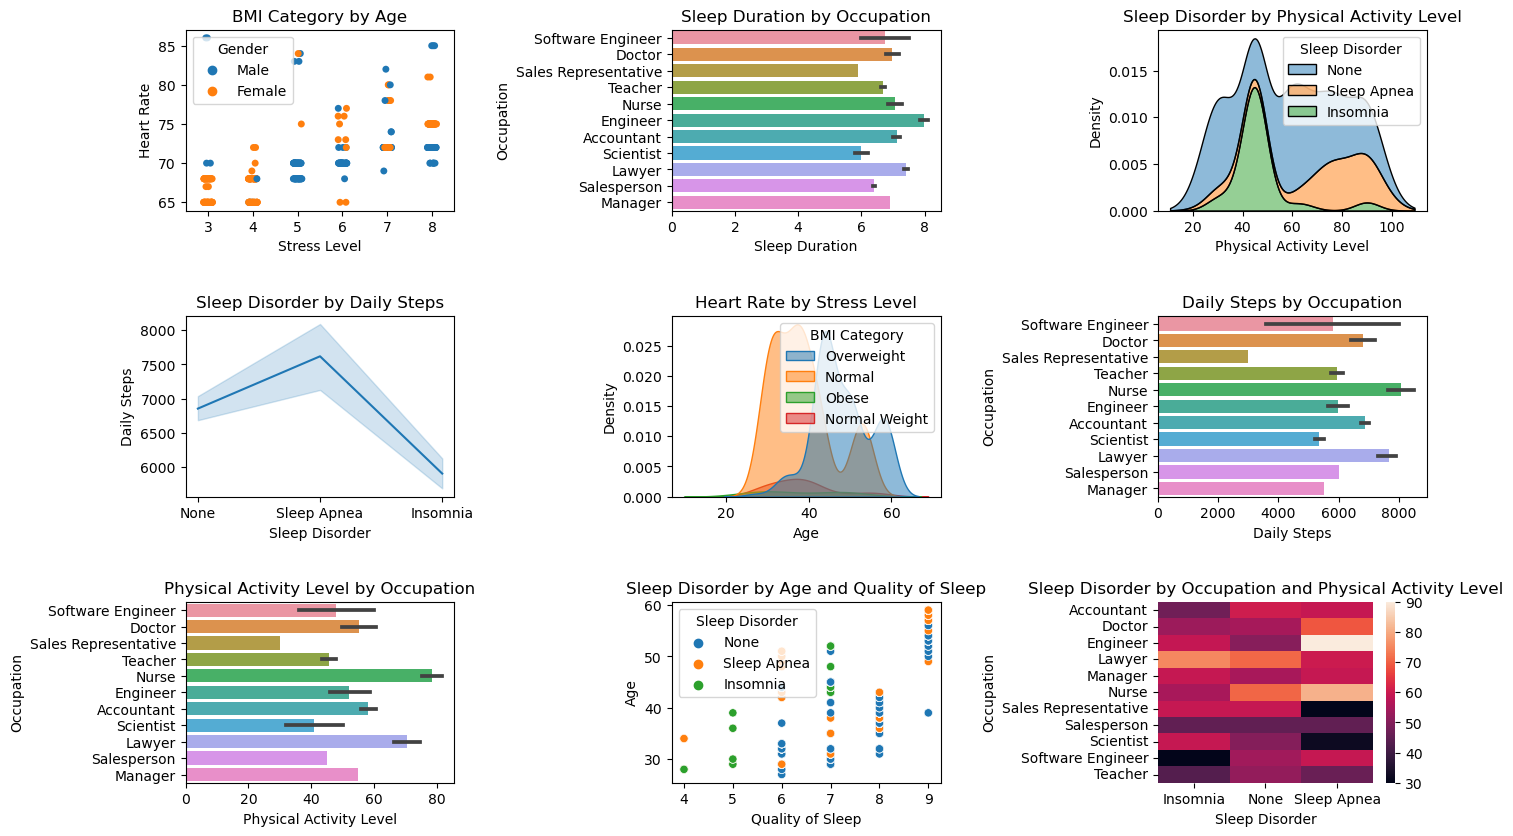

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes[0,0].set_title('BMI Category by Age')
sns.stripplot(x="Stress Level", y="Heart Rate", hue="Gender", data=df3, jitter=True, ax=axes[0,0]);

axes[0,2].set_title('Sleep Disorder by Physical Activity Level')
sns.kdeplot(data=df3, x="Physical Activity Level", hue="Sleep Disorder", fill=True, alpha=.5, multiple="stack", ax=axes[0,2]);

axes[0,1].set_title('Sleep Duration by Occupation')
sns.barplot(data=df3, x='Sleep Duration', y='Occupation', ax=axes[0,1]);

axes[1,2].set_title('Daily Steps by Occupation')
sns.barplot(data=df3, x='Daily Steps', y='Occupation', ax=axes[1,2]);

axes[1,0].set_title('Sleep Disorder by Daily Steps')
sns.lineplot(data=df3, x='Sleep Disorder', y='Daily Steps', ax=axes[1,0]);

axes[1,1].set_title('Heart Rate by Stress Level')
sns.kdeplot(data=df3, x="Age", hue="BMI Category", fill=True, alpha=.5, ax=axes[1,1]);

axes[2,0].set_title('Physical Activity Level by Occupation')
sns.barplot(data=df3, x='Physical Activity Level', y='Occupation', ax=axes[2,0]);

axes[2,1].set_title('Sleep Disorder by Age and Quality of Sleep')
sns.scatterplot(data=df3, x="Quality of Sleep", y="Age", hue="Sleep Disorder", ax=axes[2,1]);

axes[2,2].set_title("Sleep Disorder by Occupation and Physical Activity Level")
sns.heatmap(df8, ax=axes[2,2]);

plt.tight_layout(pad=3)